In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
df=pd.read_csv('wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [3]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.shape

(178, 13)

In [7]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64


Skewness of each column:
 Alcohol                -0.051047
Malic_Acid              1.030869
Ash                    -0.175207
Ash_Alcanity            0.211247
Magnesium               1.088915
Total_Phenols           0.085907
Flavanoids              0.025129
Nonflavanoid_Phenols    0.446349
Proanthocyanins         0.512769
Color_Intensity         0.861248
Hue                     0.020913
OD280                  -0.304690
Proline                 0.761336
dtype: float64


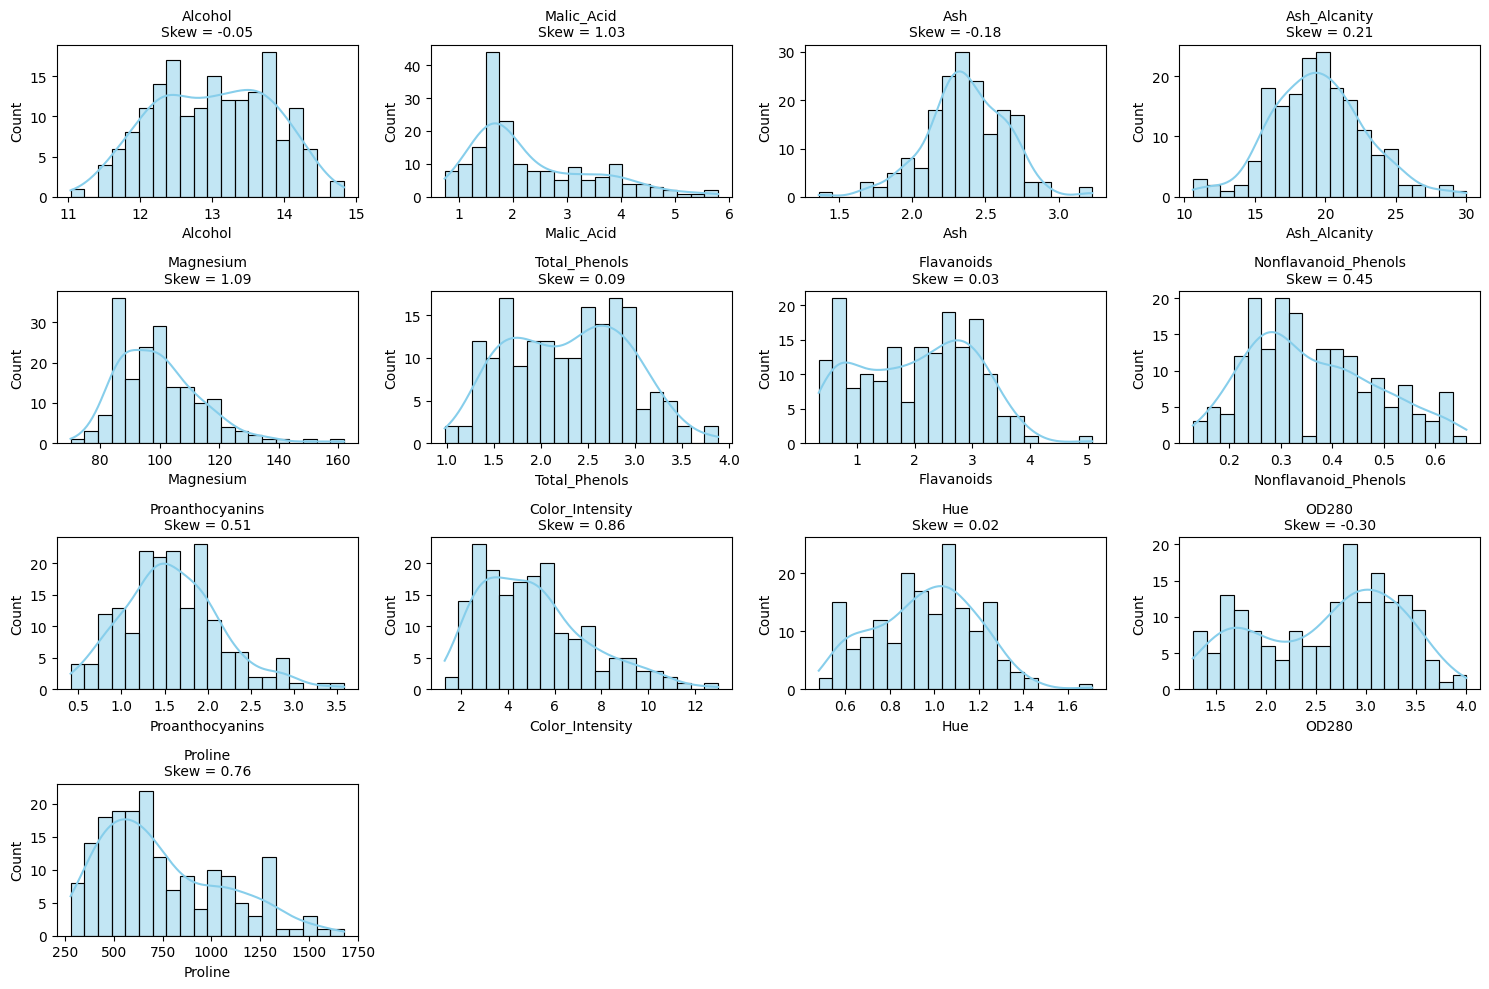

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[num_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness of each column:\n", skewness)
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{col}\nSkew = {skew(df[col]):.2f}', fontsize=10)
plt.tight_layout()
plt.show()

Skewness before transformation:
 Alcohol                -0.051047
Malic_Acid              1.030869
Ash                    -0.175207
Ash_Alcanity            0.211247
Magnesium               1.088915
Total_Phenols           0.085907
Flavanoids              0.025129
Nonflavanoid_Phenols    0.446349
Proanthocyanins         0.512769
Color_Intensity         0.861248
Hue                     0.020913
OD280                  -0.304690
Proline                 0.761336
dtype: float64

Skewness after transformation:
 Malic_Acid         0.524752
Magnesium          0.600607
Proanthocyanins   -0.170219
Color_Intensity    0.096401
Proline            0.087187
dtype: float64


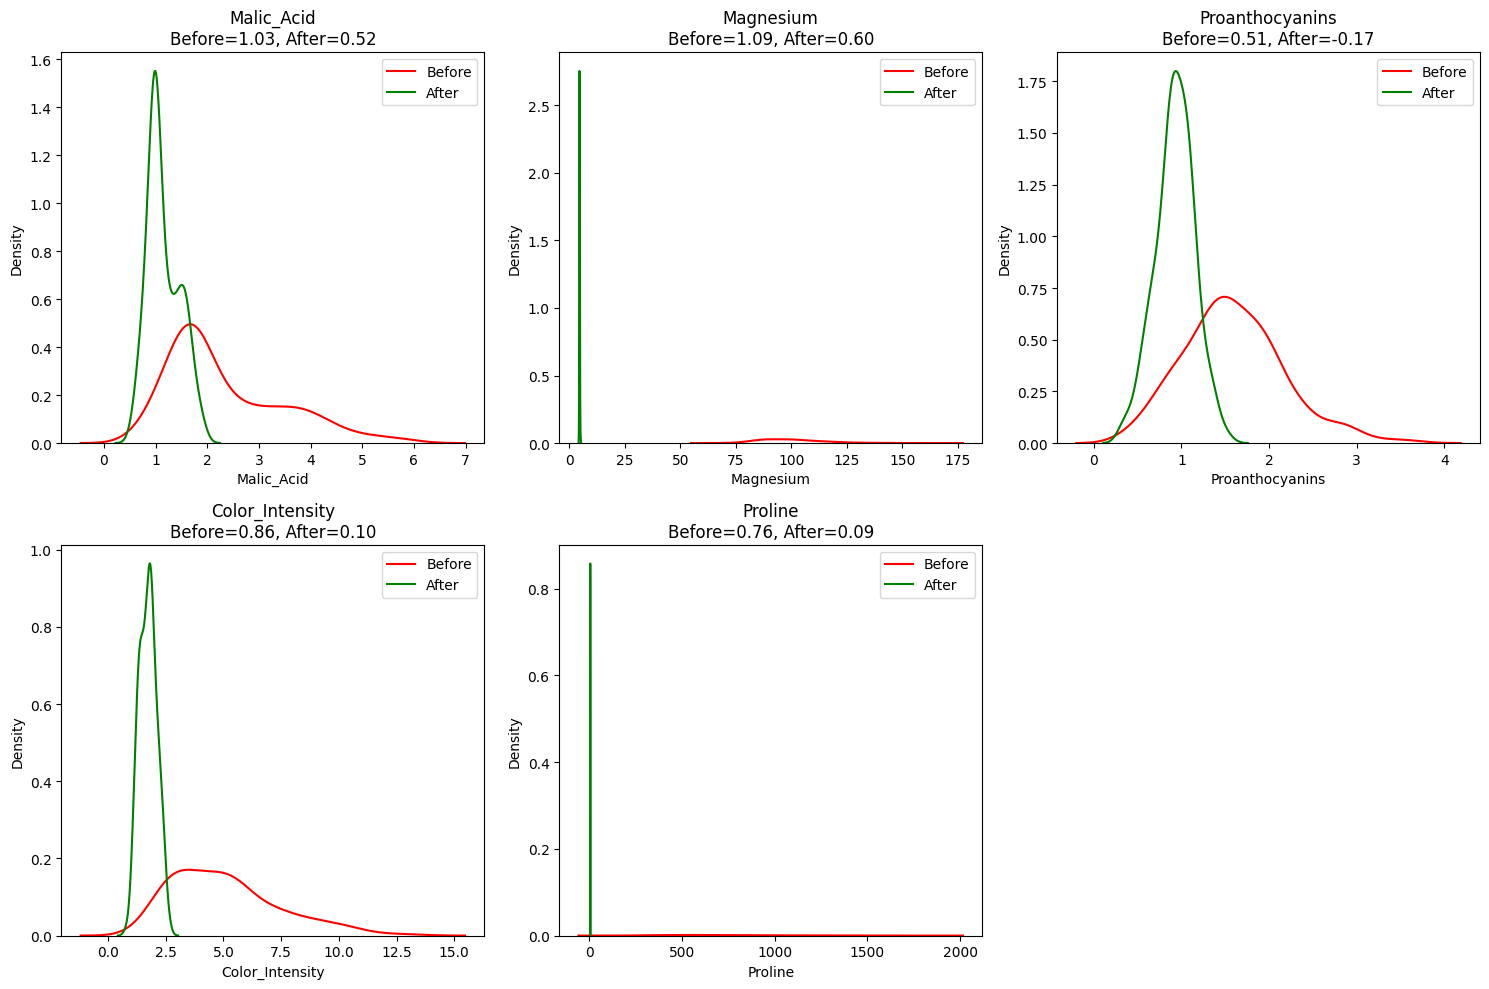

In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[num_cols].apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skewness)
threshold = 0.5
skewed_cols = skewness[abs(skewness) > threshold].index
df_transformed = df.copy()
for col in skewed_cols:
    df_transformed[col] = np.log1p(df[col])
new_skew = df_transformed[skewed_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness after transformation:\n", new_skew)
plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, (len(skewed_cols)+1)//2, i)
    sns.kdeplot(df[col], label='Before', color='red')
    sns.kdeplot(df_transformed[col], label='After', color='green')
    plt.title(f'{col}\nBefore={skew(df[col]):.2f}, After={skew(df_transformed[col]):.2f}')
    plt.legend()
plt.tight_layout()
plt.show()

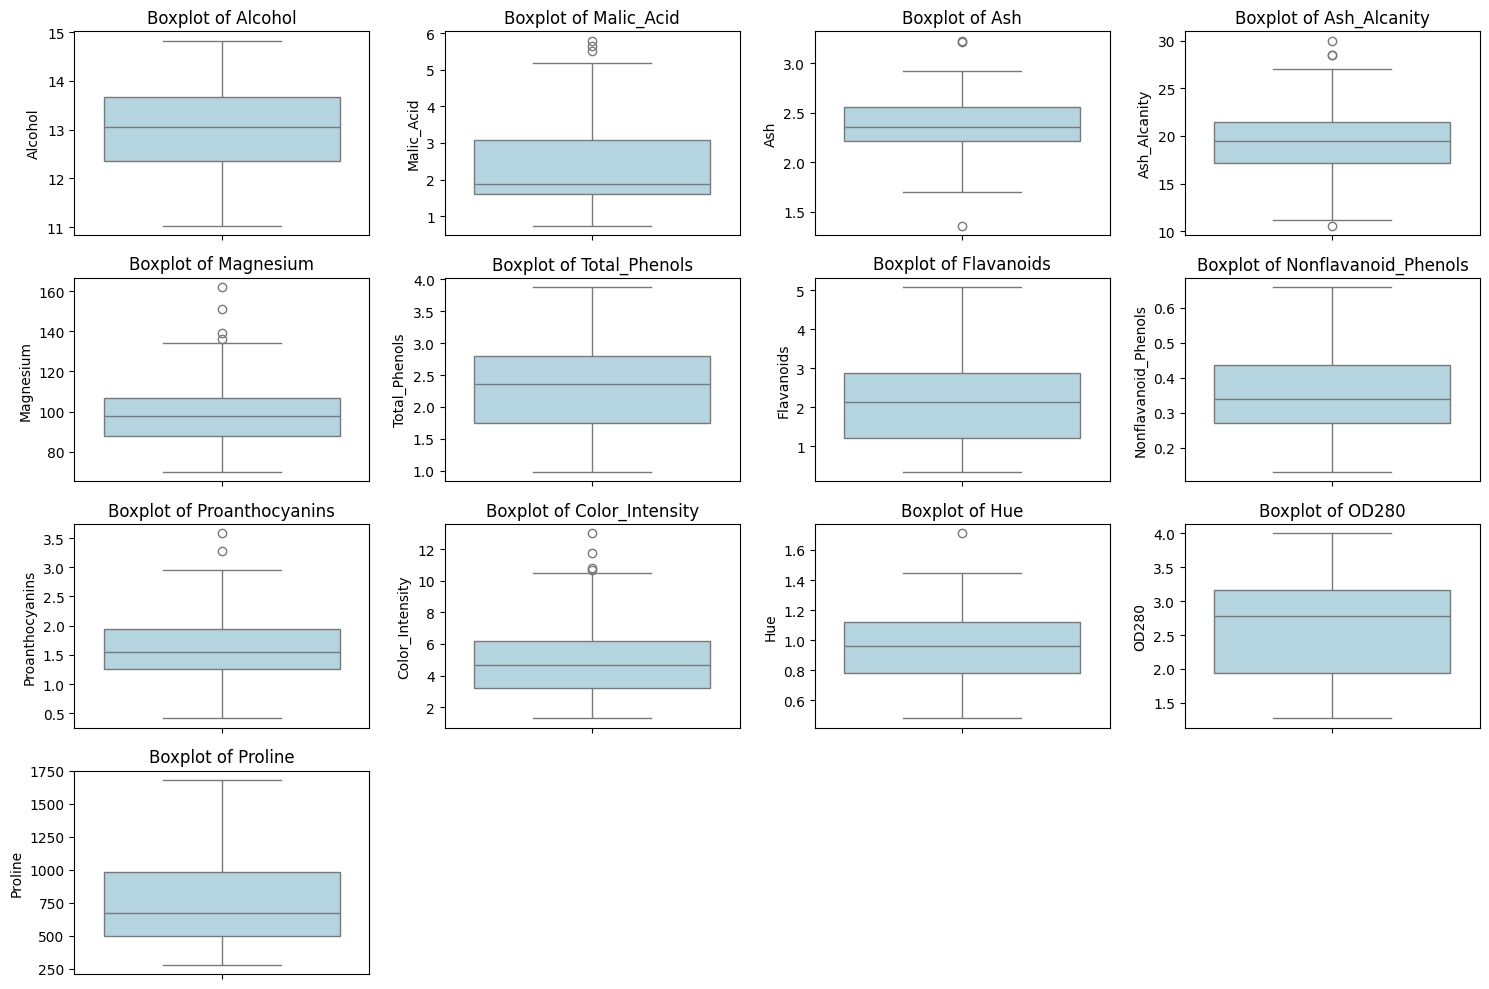

In [10]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

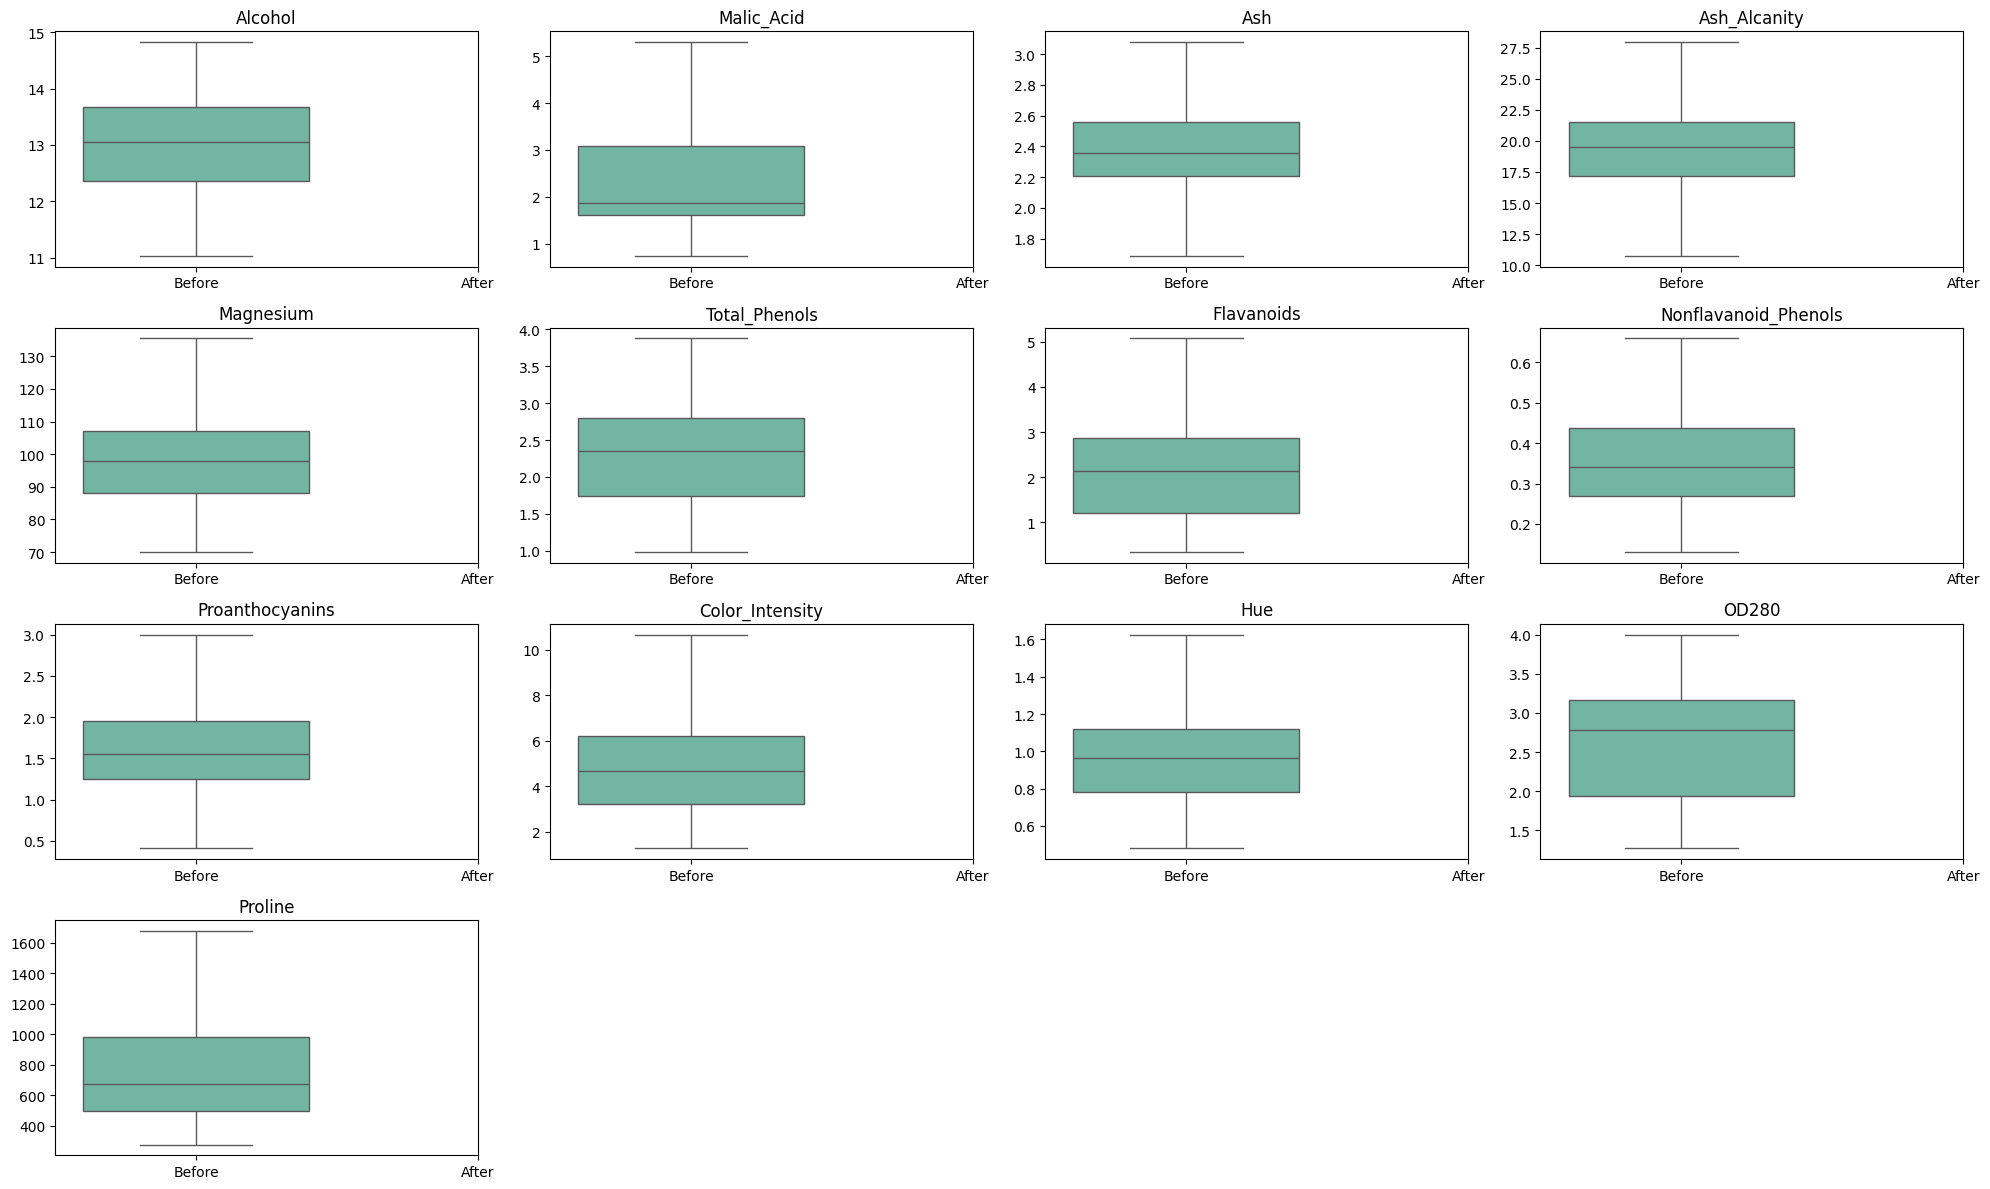

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
def reduce_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col = np.where(col < lower_bound, lower_bound, col)
    col = np.where(col > upper_bound, upper_bound, col)
    return col
df_reduced = df.copy()
for col in num_cols:
    df_reduced[col] = reduce_outliers(df[col])

plt.figure(figsize=(20, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=[df[col], df_reduced[col]], palette="Set2")
    plt.xticks([0, 1], ['Before', 'After'])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

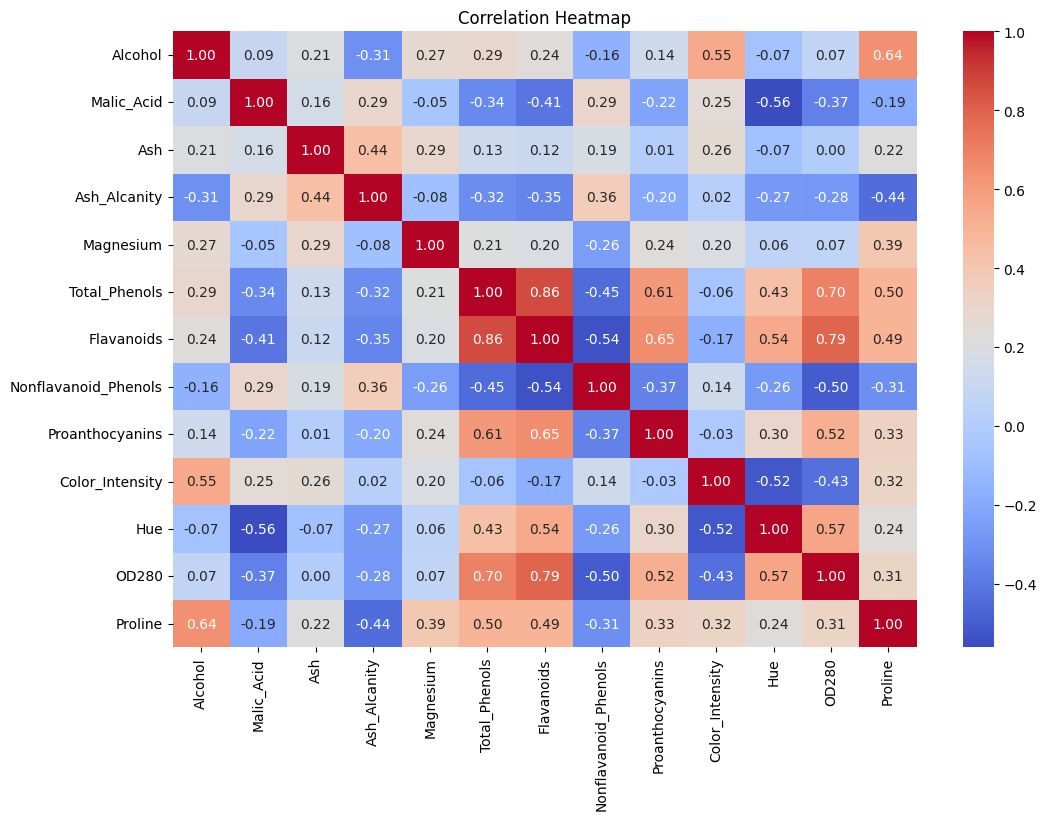

In [12]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

KMeans Silhouette Score: 0.2848589191898987
Hierarchical Silhouette Score: 0.2774439826952265
DBSCAN found clusters (excluding noise): 1
DBSCAN did not find enough clusters for silhouette score.


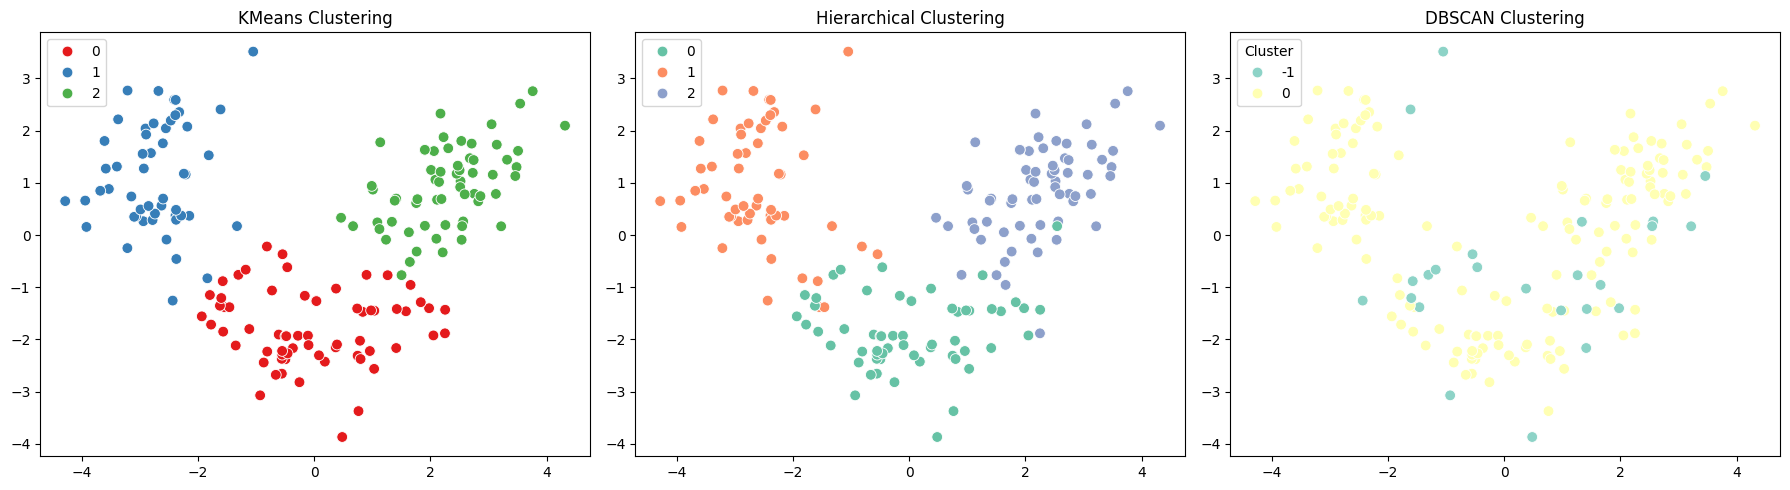

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[num_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_silhouette)

hierarchical = AgglomerativeClustering(n_clusters=3)
hier_labels = hierarchical.fit_predict(X_scaled)
hier_silhouette = silhouette_score(X_scaled, hier_labels)
print("Hierarchical Silhouette Score:", hier_silhouette)
dbscan = DBSCAN(eps=2.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

unique_labels = np.unique(db_labels)
n_clusters = len(unique_labels[unique_labels != -1])
print("DBSCAN found clusters (excluding noise):", n_clusters)

if n_clusters > 1:
    db_silhouette = silhouette_score(X_scaled[db_labels != -1], db_labels[db_labels != -1])
    print("DBSCAN Silhouette Score (excluding noise):", db_silhouette)
else:
    print("DBSCAN did not find enough clusters for silhouette score.")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set1', s=60)
plt.title("KMeans Clustering")
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hier_labels, palette='Set2', s=60)
plt.title("Hierarchical Clustering")

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_labels, palette='Set3', s=60)
plt.title("DBSCAN Clustering")
plt.legend(title='Cluster', loc='best')

plt.tight_layout()
plt.show()